In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define encoding function
def encode_categorical(df):
    # Display original data types
    print("Original data types:\n", df.dtypes)
    
    # Encode GENDER and LUNG_CANCER as binary
    df["GENDER"] = df["GENDER"].map({"M": 0, "F": 1})
    df["LUNG_CANCER"] = df["LUNG_CANCER"].map({"YES": 1, "NO": 0})
    
    # Encode binary columns mapping 1/2 to 0/1 
    binary_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 
                      'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 
                      'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
    for col in binary_columns:
        df[col] = df[col].replace({1: 0, 2: 1})  
    
    # Verify updated data types
    print("Updated data types after encoding:\n", df.dtypes)
    
   #Visualize distribution of LUNG_CANCER by GENDER
    contingency_table = pd.crosstab(df['GENDER'], df['LUNG_CANCER'])
    contingency_table.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], figsize=(8, 5))
    plt.title('Distribution of Lung Cancer by Gender (Encoded)')
    plt.xlabel('Gender (0=M, 1=F)')
    plt.ylabel('Count')
    plt.legend(title='LUNG_CANCER', labels=['NO (0)', 'YES (1)'])
    plt.xticks(rotation=0)
    plt.savefig('../results/eda_visualizations/gender_lung_cancer_distribution.png')
   
    
    return df




In [10]:
# Load the dataset processed during missing data handling
df = pd.read_csv('../results/outputs/missing_handled.csv')  
print("Original dataset head:\n", df.head())


Original dataset head:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        2               1        1              2   
1      M   71        2               2        1              1   
2      M   61        2               1        1              2   
3      M   55        2               2        1              2   
4      F   56        2               1        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         1                  2         2   
1                2         1         2         2                  1         1   
2                2         1         2         2                  1         1   
3                1         1         1         2                  2         1   
4                1         2         2         2                  2         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                   

Original data types:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object
Updated data types after encoding:
 GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DI

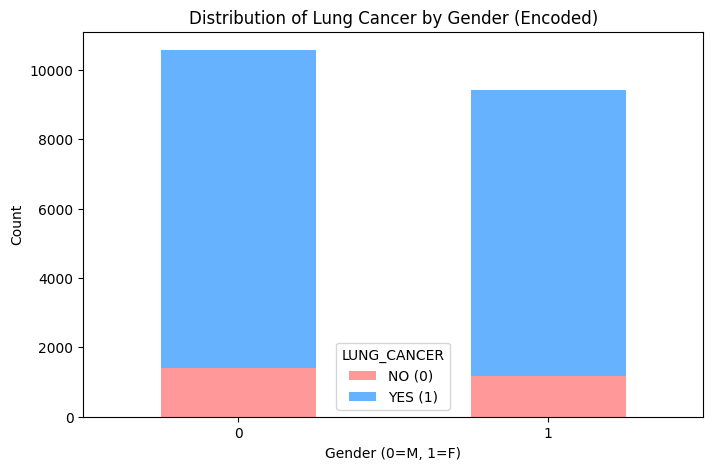

In [11]:
df = encode_categorical(df)

# Display sample of encoded data
print("Sample of encoded data:\n", df.head())



In [12]:
# Save the processed dataset for the next step
df.to_csv('../results/outputs/encoded_data.csv', index=False)
print("Saved to '../results/outputs/encoded_data.csv'")

Saved to '../results/outputs/encoded_data.csv'
